In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
A_fn = './sample1/A.npy'
b_fn = './sample1/I.npy'
x_fn = './sample1/x_gt.npy'

N = 40 # number of illumination patterns
W = 25 # number of wavelengths
width, height = 890, 580 # width, height of camera
M = width * height


b = np.load(b_fn)
A = np.load(A_fn)
x = np.load(x_fn).reshape(-1,W,1)


# A shape : width , height, N, 3 (rgb channel), W
# I(b) shape : width, height, N, 3(rgb), 1 

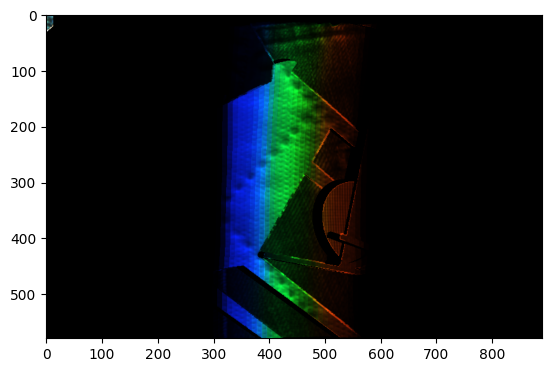

In [5]:
plt.imshow(b.reshape(height,width,N,3)[:,:,0,:])

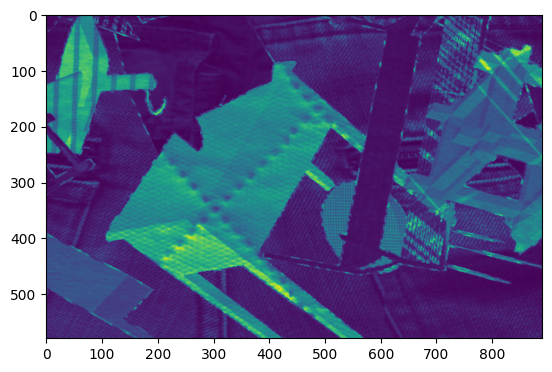

In [6]:
plt.imshow(x.reshape(height,width,W)[:,:,0])

In [7]:
A.shape, b.shape, x.shape

((516200, 120, 25), (61944000, 1), (516200, 25, 1))

In [8]:
b = (A@x.reshape(-1,25,1))

In [ ]:
for i in range(N):
    plt.figure()
    plt.imshow(b.reshape(height,width,N,3)[:,:,i,:])
    plt.title('b')

In [10]:
device='cuda'

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, fdim = 1000):
        super(MLP, self).__init__()
        
        self.input_dim = input_dim
        
        self.fc1 = nn.Linear(input_dim , fdim, bias = True) # +2 for added (x,y) dim
        self.fc2 = nn.Linear(fdim, fdim, bias = True)
        self.fc3 = nn.Linear(fdim, fdim, bias = True)
        self.fc4 = nn.Linear(fdim, fdim, bias = True)
        self.fc5 = nn.Linear(fdim, fdim, bias = True)
        self.fc6 = nn.Linear(fdim, fdim, bias = True)
        self.fc7 = nn.Linear(fdim, fdim, bias = True)
        self.fc8 = nn.Linear(fdim, 128, bias = True)
        self.fc9 = nn.Linear(128, output_dim, bias = True) # 2        
        
    def forward(self, A, b):
        x = torch.cat((A, b), dim=2).flatten()
        # print(x.shape)
        x = x.view(-1, self.input_dim)
        # print(x.shape)

        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        x = F.relu(x)
        x = self.fc7(x)
        x = F.relu(x)
        x = self.fc8(x)
        x = F.relu(x)
        x = self.fc9(x)
        
        return x
    


In [12]:
A.shape, x.shape, b.shape

num_train = 215900
num_test = M-num_train
A_train = A[:]
px_ind = torch.randperm(M)
px_ind_train = px_ind[:num_train]
px_ind_test = px_ind[num_train:]

A_train = A[px_ind_train,:,:]
b_train = b[px_ind_train,:,:]
x_train = x[px_ind_train,:,:]

A_test = A[px_ind_test,:,:]
b_test = b[px_ind_test,:,:]
x_test = x[px_ind_test,:,:]


In [13]:
A_train.shape, A_test.shape

((215900, 120, 25), (300300, 120, 25))

epoch 0, {0/4318th iter} Train Loss:  0.1425589621067047


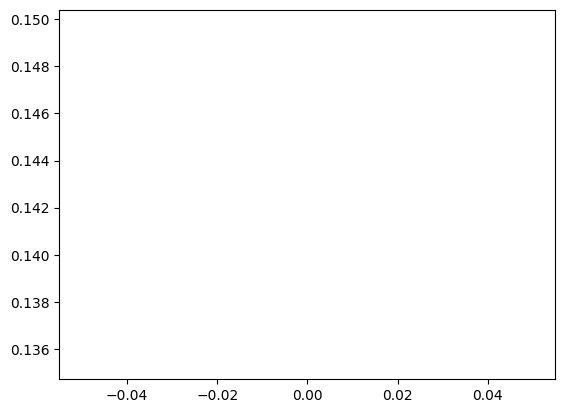

epoch 0, {100/4318th iter} Train Loss:  0.03678752854466438
epoch 0, {200/4318th iter} Train Loss:  0.02157709002494812
epoch 0, {300/4318th iter} Train Loss:  0.021423835307359695
epoch 0, {400/4318th iter} Train Loss:  0.014918806031346321
epoch 0, {500/4318th iter} Train Loss:  0.01214639749377966


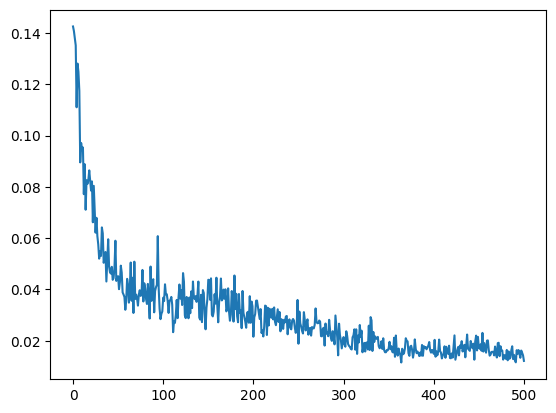

epoch 0, {600/4318th iter} Train Loss:  0.017524154856801033
epoch 0, {700/4318th iter} Train Loss:  0.013885486871004105
epoch 0, {800/4318th iter} Train Loss:  0.010943393222987652
epoch 0, {900/4318th iter} Train Loss:  0.007369427476078272
epoch 0, {1000/4318th iter} Train Loss:  0.007239736616611481


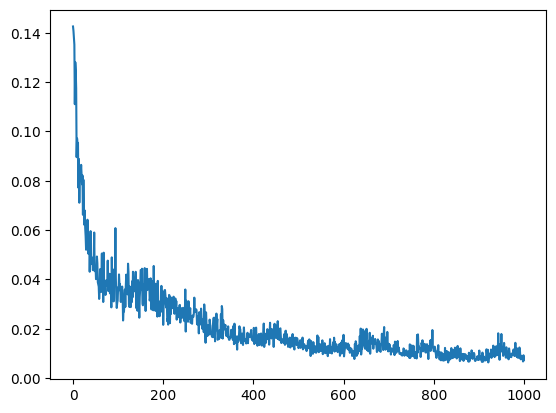

epoch 0, {1100/4318th iter} Train Loss:  0.00586081575602293
epoch 0, {1200/4318th iter} Train Loss:  0.005807371344417334
epoch 0, {1300/4318th iter} Train Loss:  0.006518834736198187
epoch 0, {1400/4318th iter} Train Loss:  0.006138558499515057
epoch 0, {1500/4318th iter} Train Loss:  0.005090337246656418


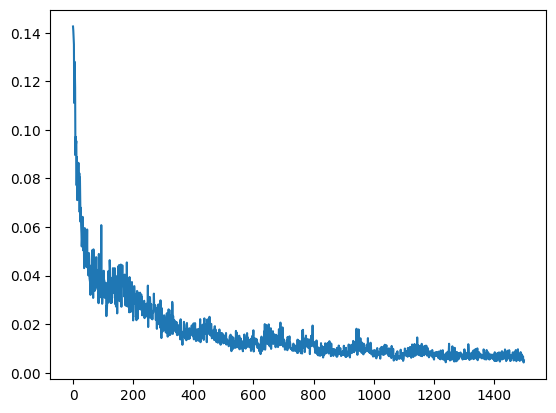

epoch 0, {1600/4318th iter} Train Loss:  0.005275967065244913
epoch 0, {1700/4318th iter} Train Loss:  0.009441697038710117
epoch 0, {1800/4318th iter} Train Loss:  0.007856654934585094
epoch 0, {1900/4318th iter} Train Loss:  0.004475800320506096
epoch 0, {2000/4318th iter} Train Loss:  0.006437248084694147


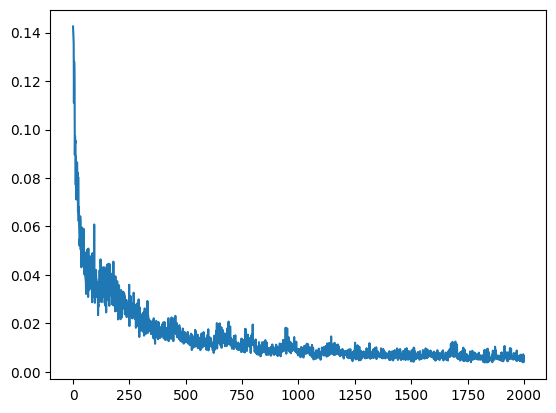

epoch 0, {2100/4318th iter} Train Loss:  0.003956554923206568
epoch 0, {2200/4318th iter} Train Loss:  0.004654624965041876
epoch 0, {2300/4318th iter} Train Loss:  0.006629939191043377
epoch 0, {2400/4318th iter} Train Loss:  0.006770615000277758
epoch 0, {2500/4318th iter} Train Loss:  0.0053707025945186615


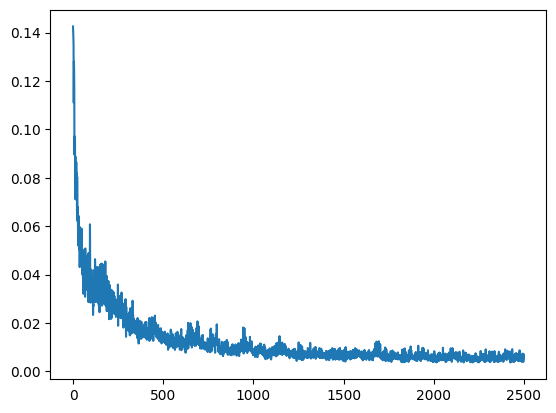

epoch 0, {2600/4318th iter} Train Loss:  0.0062404959462583065
epoch 0, {2700/4318th iter} Train Loss:  0.004975495859980583
epoch 0, {2800/4318th iter} Train Loss:  0.004783805459737778
epoch 0, {2900/4318th iter} Train Loss:  0.004517901688814163
epoch 0, {3000/4318th iter} Train Loss:  0.004563317634165287


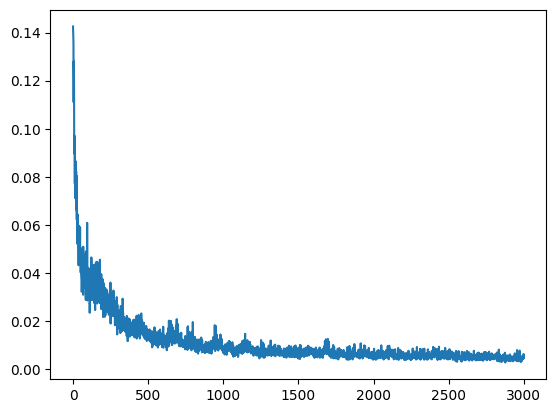

epoch 0, {3100/4318th iter} Train Loss:  0.003743728157132864
epoch 0, {3200/4318th iter} Train Loss:  0.003636702662333846
epoch 0, {3300/4318th iter} Train Loss:  0.003646428929641843
epoch 0, {3400/4318th iter} Train Loss:  0.0032294050324708223
epoch 0, {3500/4318th iter} Train Loss:  0.003039465518668294


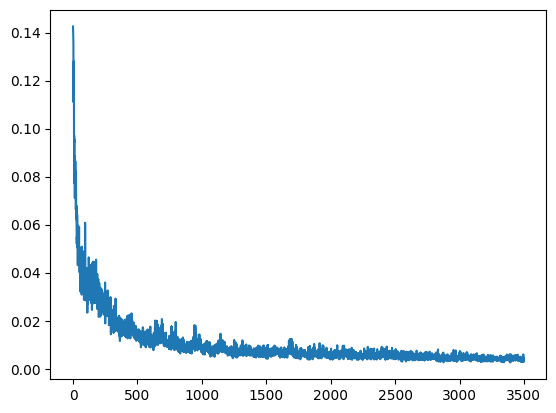

epoch 0, {3600/4318th iter} Train Loss:  0.003731624921783805
epoch 0, {3700/4318th iter} Train Loss:  0.0030797680374234915
epoch 0, {3800/4318th iter} Train Loss:  0.003811151022091508
epoch 0, {3900/4318th iter} Train Loss:  0.0030025204177945852
epoch 0, {4000/4318th iter} Train Loss:  0.0036699497140944004


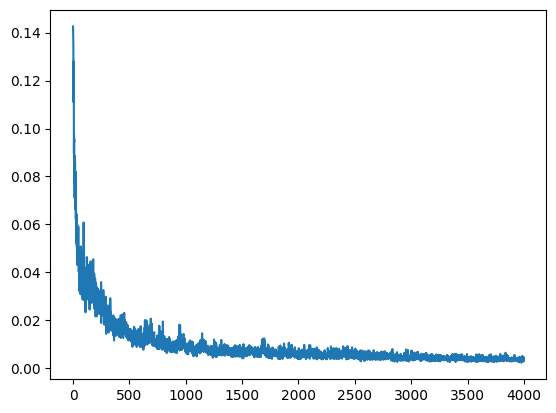

epoch 0, {4100/4318th iter} Train Loss:  0.00467402720823884
epoch 0, {4200/4318th iter} Train Loss:  0.0039049529004842043
epoch 0, {4300/4318th iter} Train Loss:  0.002783756470307708


In [14]:
# bring model MLP
model = MLP(input_dim=3*N*(W+1), output_dim=W, fdim=5000).to(device=device) 

# optimizer, schedular, loss function
optimizer = torch.optim.Adam(list(model.parameters()), lr= 1e-4)
scheduler = torch.optim.lr_scheduler.StepLR((optimizer), step_size=350, gamma=0.9)

loss_fn = torch.nn.L1Loss()
loss_fn.requires_grad_ = True

max_iter = 100000
losses = []
losses_val = []
model.train()
epochs = 1
batch_size = 50

for epoch in range(epochs):
    for i in range(num_train//batch_size):

        A_train_batch = A_train[i*batch_size:(i+1)*batch_size,:,:]
        b_train_batch = b_train[i*batch_size:(i+1)*batch_size,:,:]
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:]

        A_train_batch = torch.tensor(A_train_batch, device=device)
        b_train_batch = torch.tensor(b_train_batch, device=device)
        x_train_batch = torch.tensor(x_train_batch, device=device)

        x_est = model(A_train_batch, b_train_batch)

        loss = loss_fn(x_train_batch.squeeze(), x_est)
            
        losses.append(loss.item())
            
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # scheduler
        scheduler.step()
        
        if i%100 == 0:
            print("epoch %d, {%d/%dth iter} Train Loss: "%(epoch, i, num_train//batch_size), losses[-1])
        if i%500 == 0:
            plt.figure()
            plt.plot(losses)
            plt.show()

        # if i%1000 == 0:
        #     A_test_batch = torch.tensor(A_test, device=device)
        #     b_test_batch = torch.tensor(b_test, device=device)
        #     x_test_batch = torch.tensor(x_test, device=device)

        #     x_est = model(A_test_batch, b_test_batch)

        #     loss = loss_fn(x_test_batch.squeeze(), x_est)
                
        #     losses_val.append(loss.item())
        #     print("epoch %d, {%d/%dth iter} Train Loss: "%(epoch, i, num_train//batch_size), losses_val[-1])
        #     plt.figure()
        #     plt.plot(losses_val)
        #     plt.show()



In [13]:
torch.save(model.state_dict(), './hyp_mlp.pth')

In [14]:
batch_size = 10000
x_est = np.zeros_like(x)
for i in range(A.shape[0]//batch_size+1):
    print(i, A.shape[0]//batch_size+1)
    i_min = i * batch_size
    i_max = min((i+1) * batch_size, A.shape[0])
    A_batch = torch.tensor(A[i_min:i_max,:,:], device=device)
    b_batch = torch.tensor(b[i_min:i_max,:,:], device=device)
    x_batch = torch.tensor(x[i_min:i_max,:,:], device=device)

    x_est[i_min:i_max,:,0] = model(A_batch, b_batch).data.cpu().numpy()   

0 52
1 52
2 52
3 52
4 52
5 52
6 52
7 52
8 52
9 52
10 52
11 52
12 52
13 52
14 52
15 52
16 52
17 52
18 52
19 52
20 52
21 52
22 52
23 52
24 52
25 52
26 52
27 52
28 52
29 52
30 52
31 52
32 52
33 52
34 52
35 52
36 52
37 52
38 52
39 52
40 52
41 52
42 52
43 52
44 52
45 52
46 52
47 52
48 52
49 52
50 52
51 52


In [15]:
np.abs(x_est-x).mean()

0.003360174

In [16]:
x_est_im = x_est.reshape(height, width, W)

In [17]:
x_im = x.reshape(height, width, W)

c:\Users\mainuser\anaconda3\envs\dwave\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


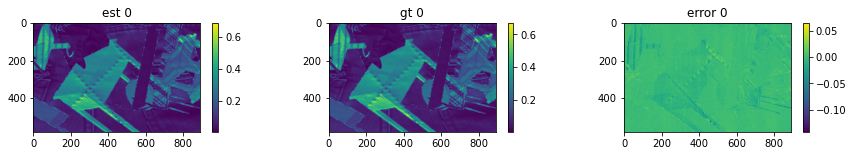

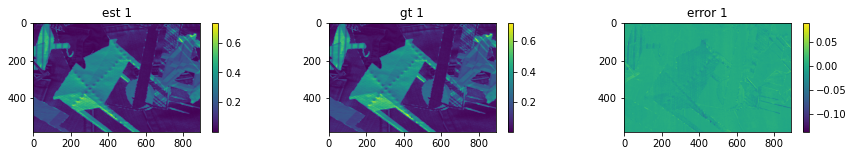

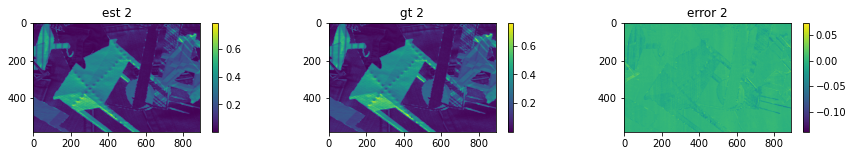

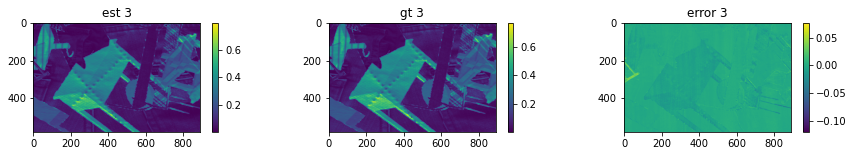

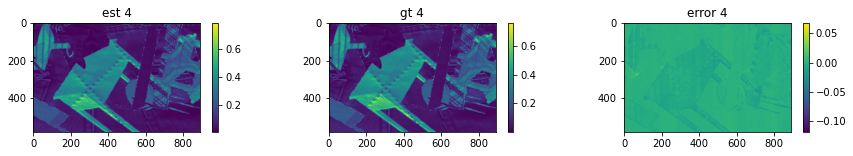

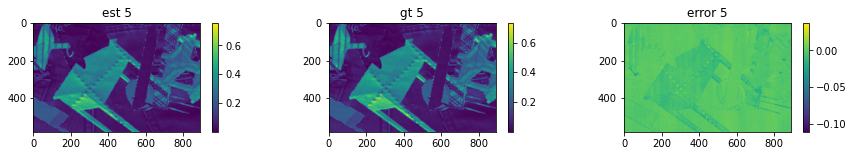

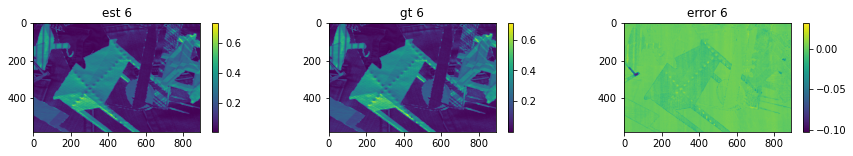

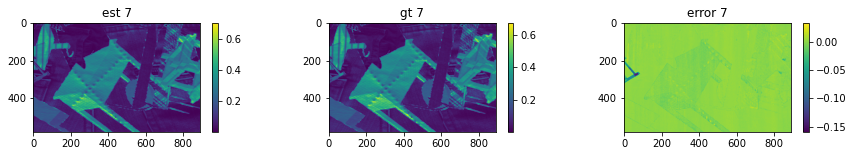

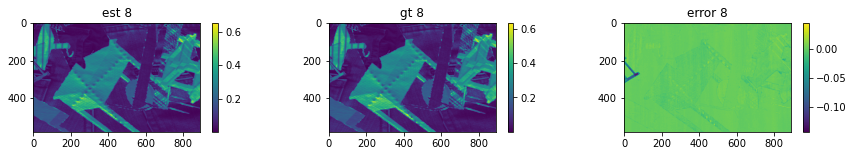

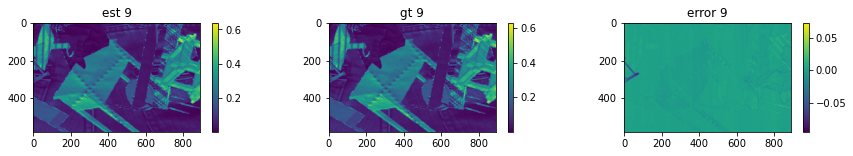

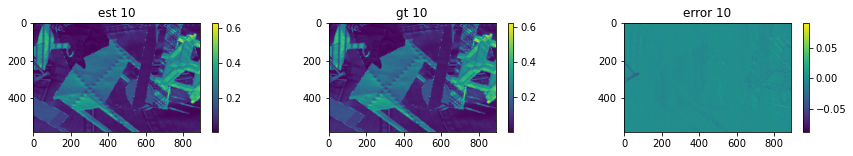

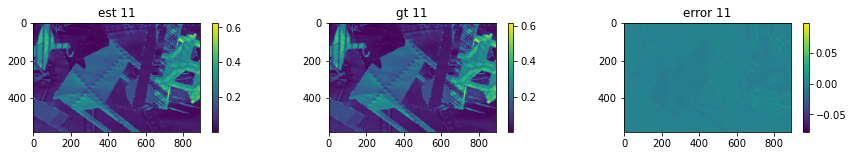

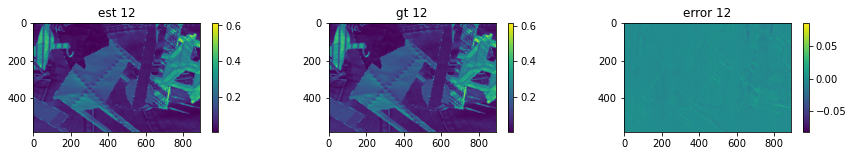

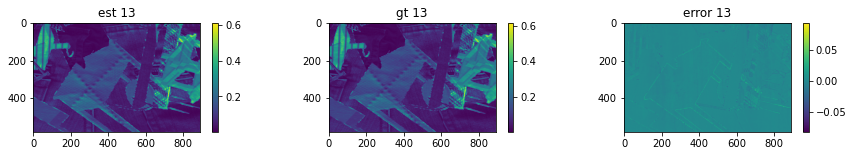

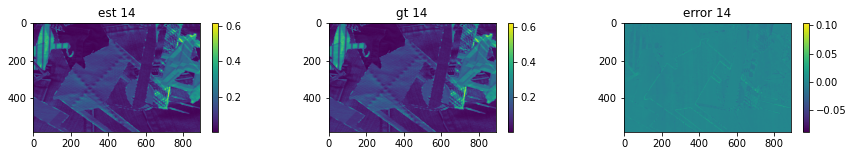

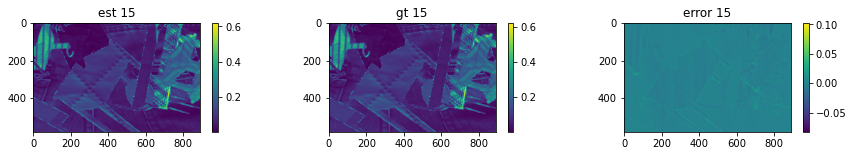

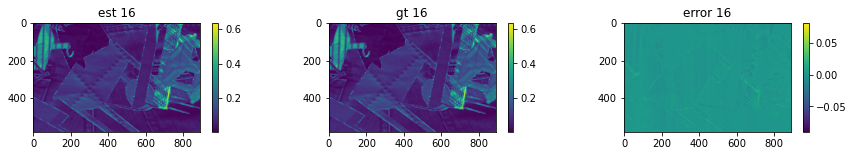

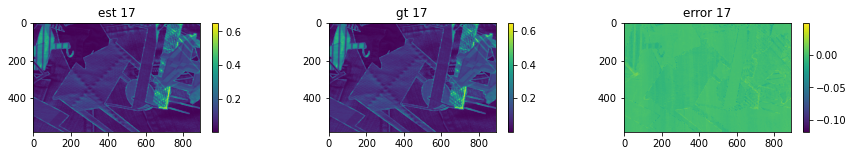

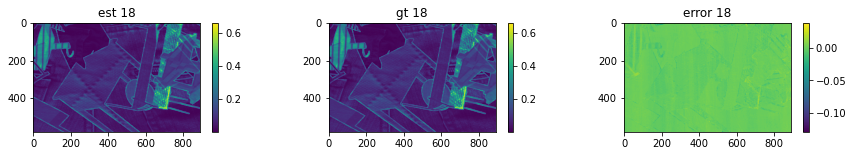

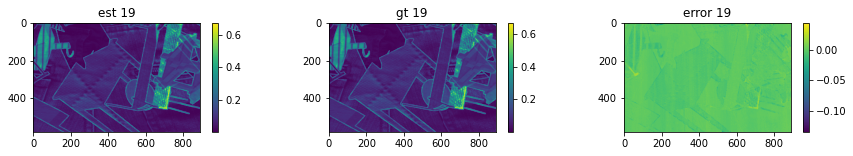

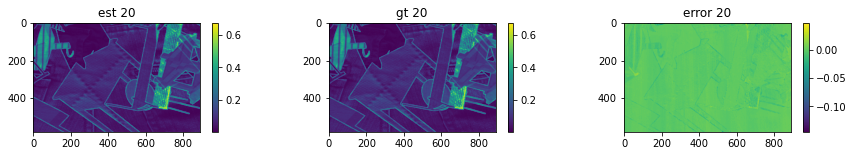

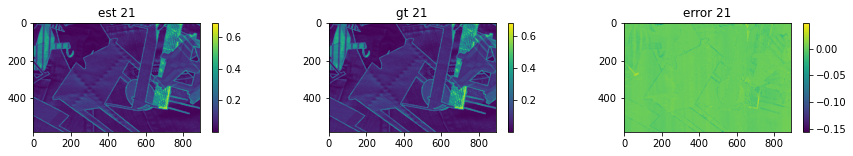

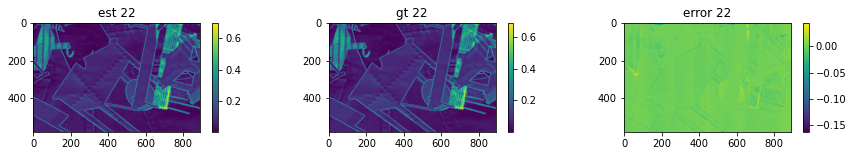

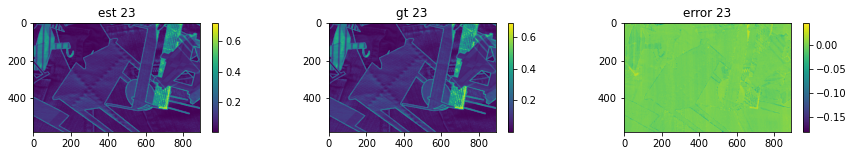

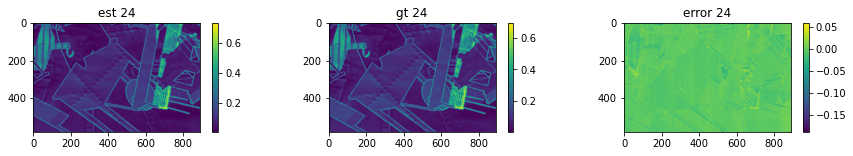

In [18]:
for i in range(W):
    plt.figure(figsize=(15,2))
    plt.subplot(131)
    plt.imshow(x_est_im[:,:,i])
    plt.colorbar()
    plt.title('est %d'%i)
    plt.subplot(132)
    plt.imshow(x_im[:,:,i])
    plt.colorbar()
    plt.title('gt %d'%i)
    plt.subplot(133)
    plt.imshow(x_est_im[:,:,i]-x_im[:,:,i])
    plt.colorbar()
    plt.title('error %d'%i)

In [19]:
A_fn = './sample2/A.npy'
b_fn = './sample2/I.npy'
x_fn = './sample2/x_gt.npy'

b_test_another_image = np.load(b_fn).reshape(M, 3*N, 1)
A_test_another_image = np.load(A_fn)
x_test_another_image = np.load(x_fn).reshape(-1,W,1)

model = MLP(input_dim=3*N*(W+1), output_dim=W, fdim=5000).to(device=device) 
model.load_state_dict(torch.load('./hyp_mlp.pth', map_location=device))

<All keys matched successfully>

In [20]:
A_test_another_image.shape, b_test_another_image.shape, x_test_another_image.shape

((516200, 120, 25), (516200, 120, 1), (516200, 25, 1))

In [21]:
b_test_recon = (A_test_another_image@x_test_another_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

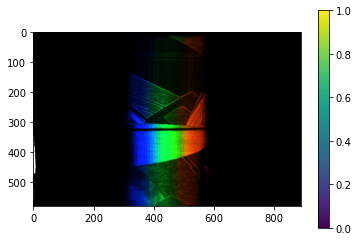

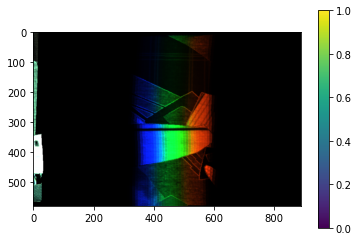

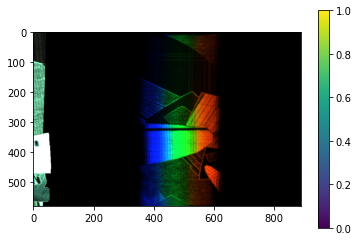

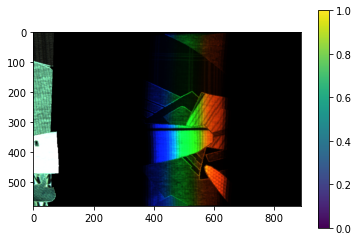

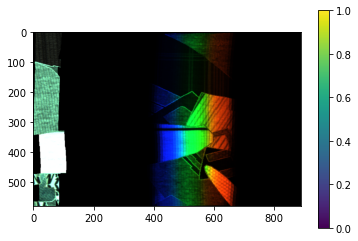

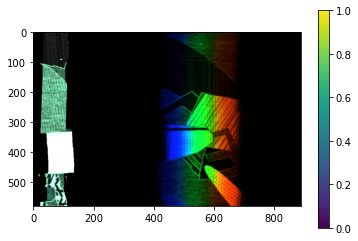

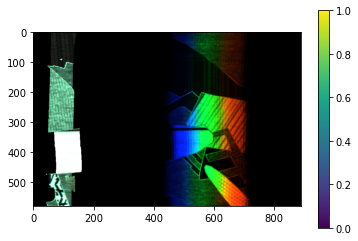

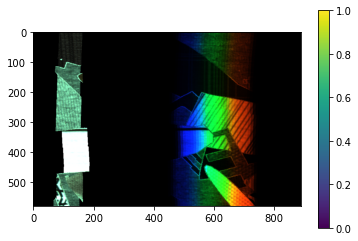

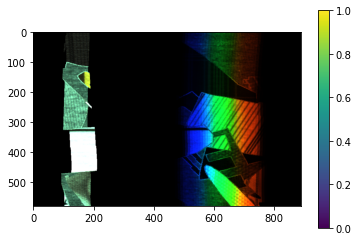

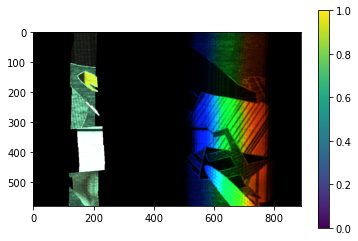

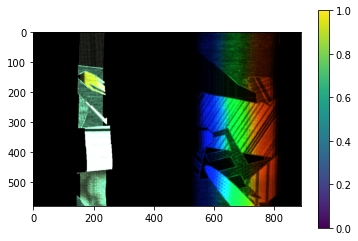

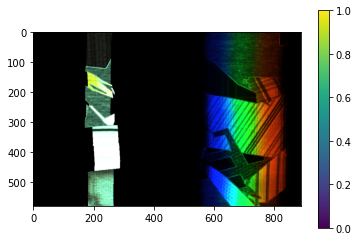

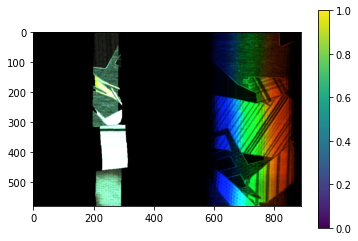

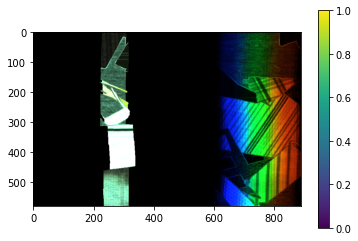

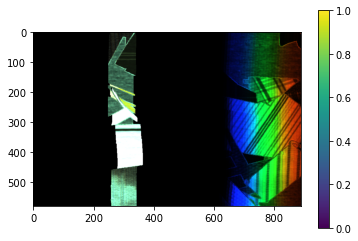

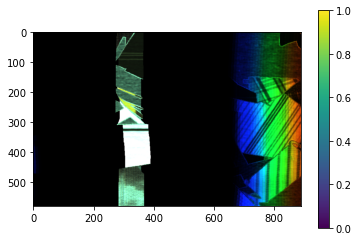

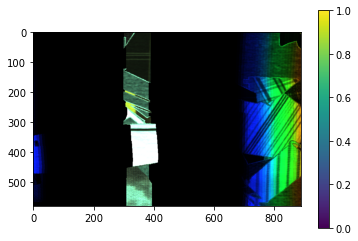

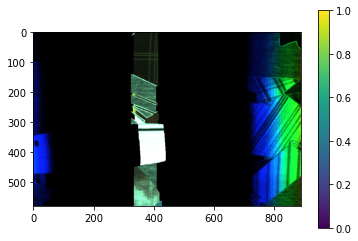

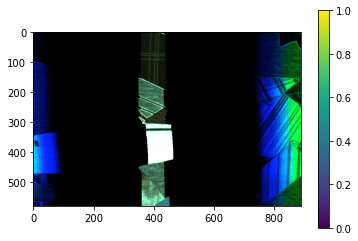

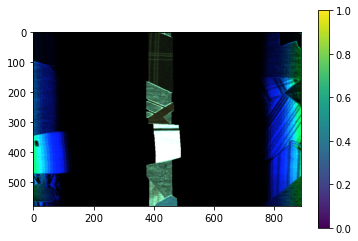

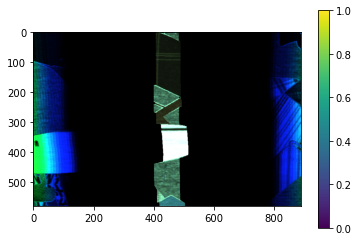

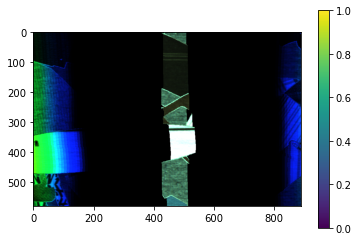

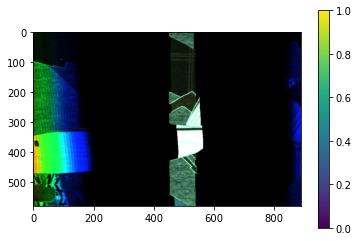

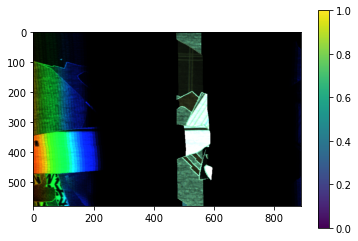

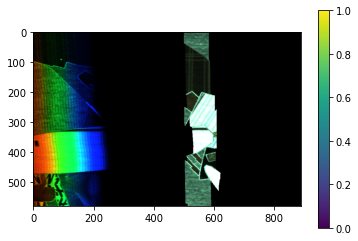

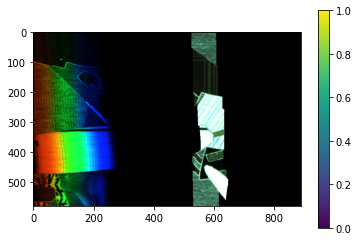

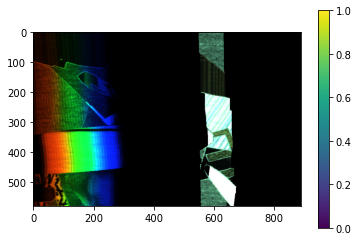

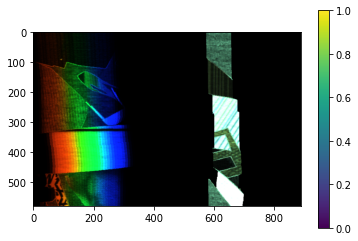

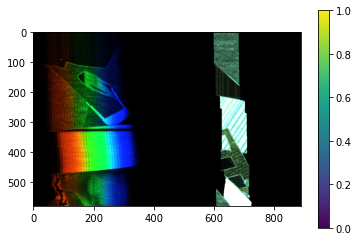

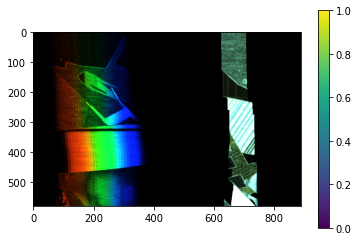

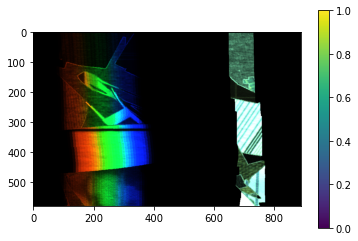

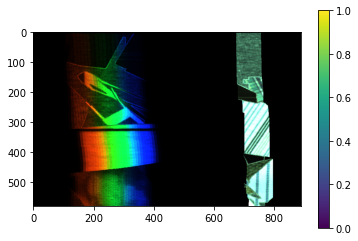

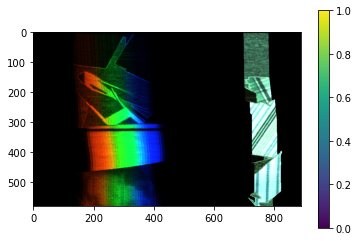

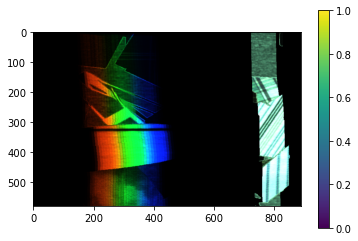

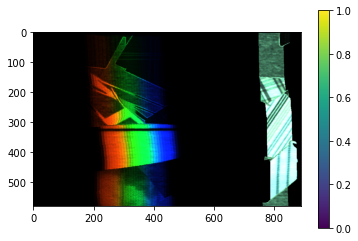

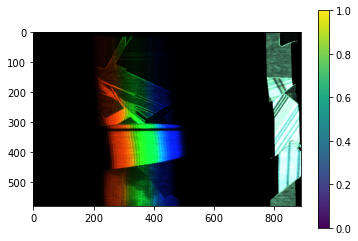

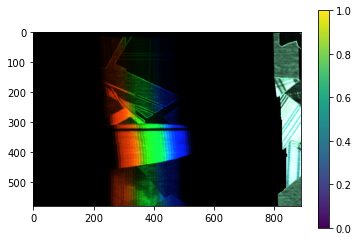

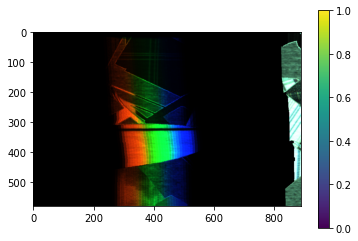

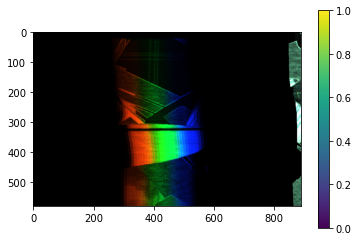

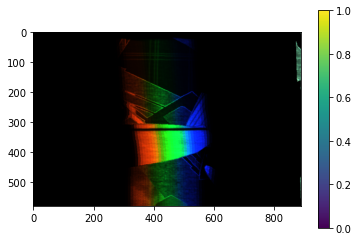

In [33]:
for i in range(N):
    plt.figure()
    plt.imshow(b_test_recon.reshape(height,width,N,3)[:,:,i,:])

In [23]:
batch_size = 10000
x_est = np.zeros_like(x_test_another_image)
for i in range(A_test_another_image.shape[0]//batch_size+1):
    print(i, A_test_another_image.shape[0]//batch_size+1)
    i_min = i * batch_size
    i_max = min((i+1) * batch_size, A_test_another_image.shape[0])
    A_batch = torch.tensor(A_test_another_image[i_min:i_max,:,:], device=device)
    b_batch = torch.tensor(b_test_another_image[i_min:i_max,:,:], device=device)

    x_est[i_min:i_max,:,0] = model(A_batch, b_batch).data.cpu().numpy()   

0 52
1 52
2 52
3 52
4 52
5 52
6 52
7 52
8 52
9 52
10 52
11 52
12 52
13 52
14 52
15 52
16 52
17 52
18 52
19 52
20 52
21 52
22 52
23 52
24 52
25 52
26 52
27 52
28 52
29 52
30 52
31 52
32 52
33 52
34 52
35 52
36 52
37 52
38 52
39 52
40 52
41 52
42 52
43 52
44 52
45 52
46 52
47 52
48 52
49 52
50 52
51 52


In [24]:
x_est_im = x_est.reshape(height, width, W)

In [25]:
x_im = x_test_another_image.reshape(height, width, W)

c:\Users\mainuser\anaconda3\envs\dwave\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


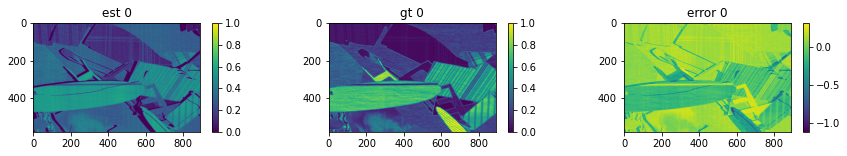

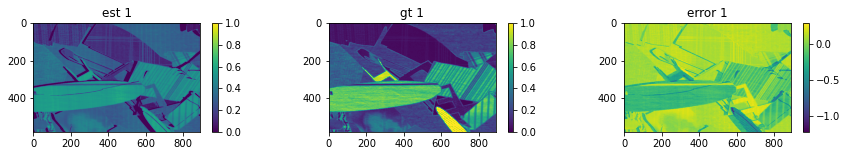

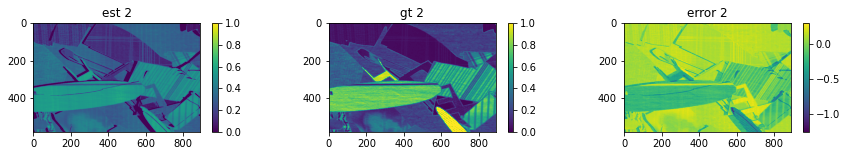

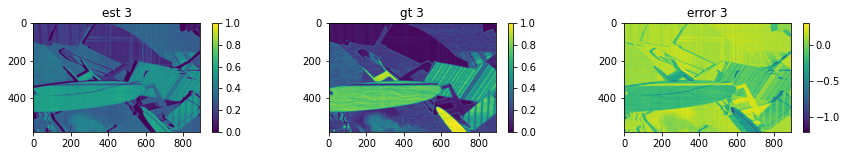

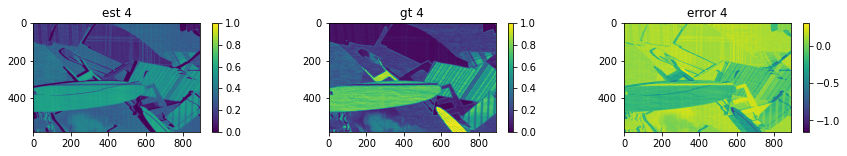

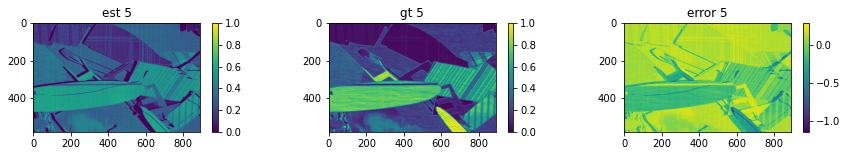

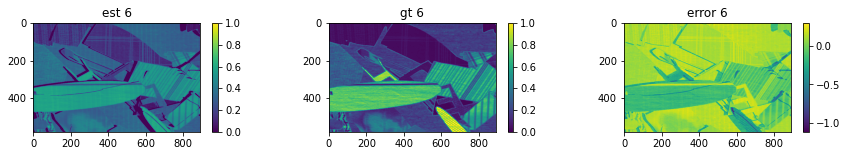

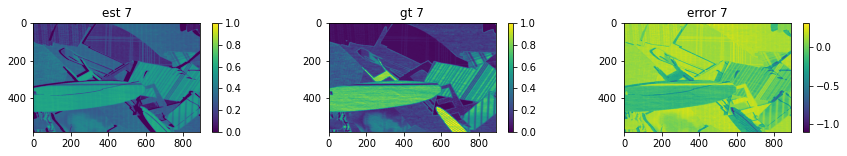

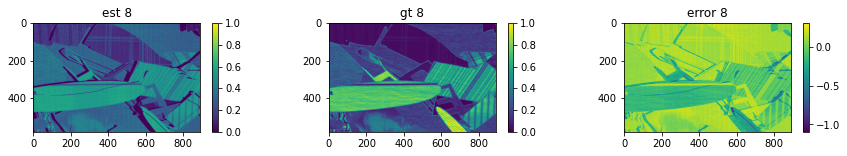

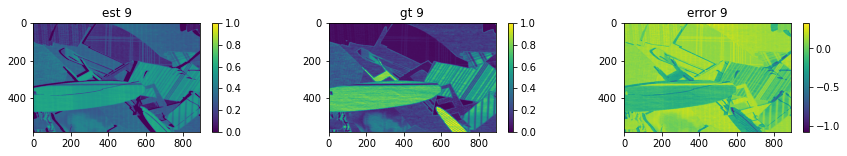

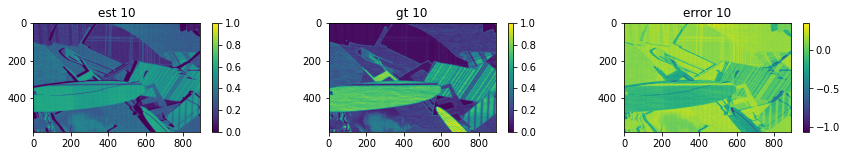

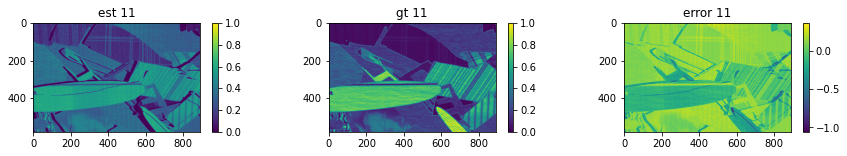

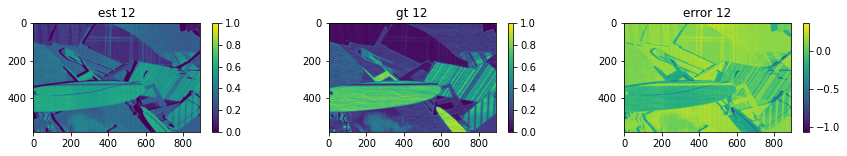

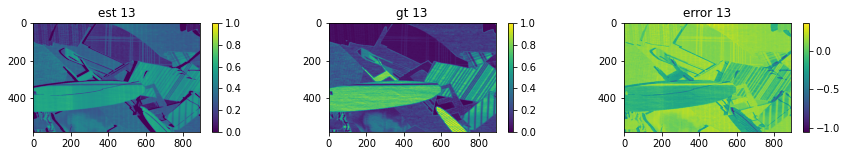

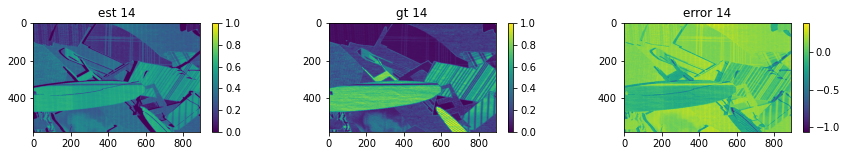

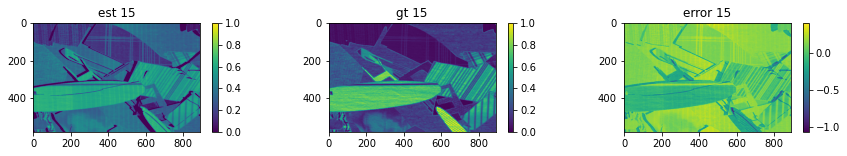

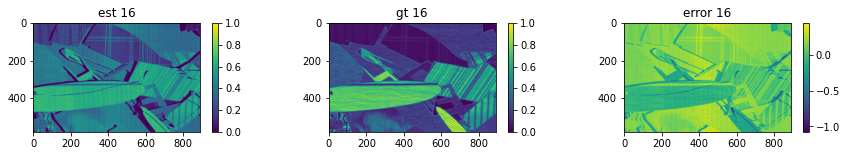

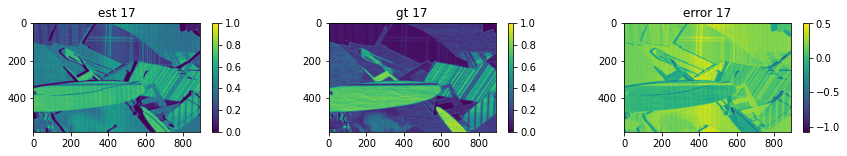

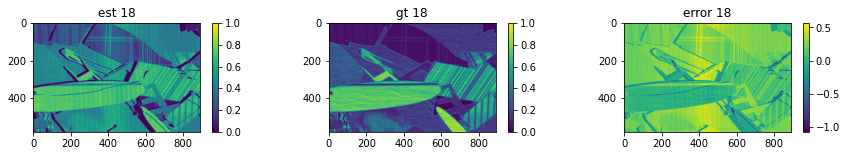

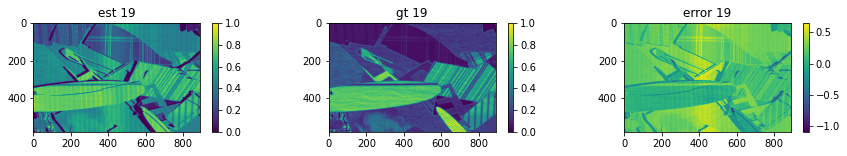

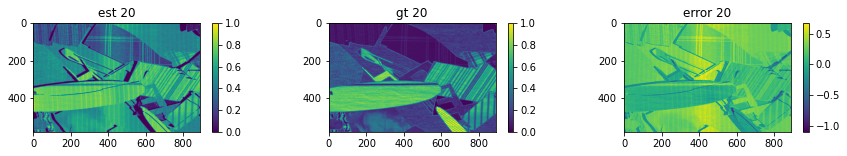

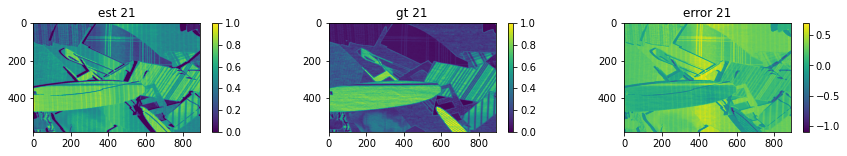

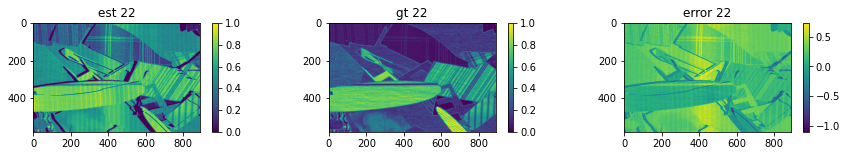

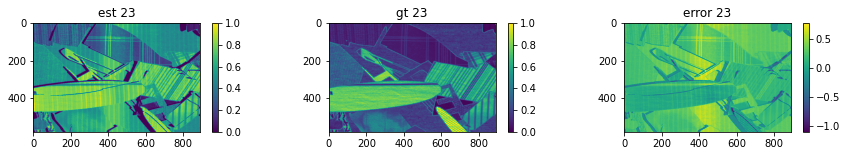

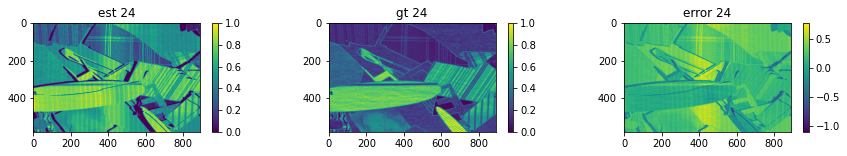

In [26]:
for i in range(W):
    plt.figure(figsize=(15,2))
    plt.subplot(131)
    plt.imshow(x_est_im[:,:,i],  vmin=0, vmax=1)
    plt.colorbar()
    plt.title('est %d'%i)
    plt.subplot(132)
    plt.imshow(x_im[:,:,i],  vmin=0, vmax=1)
    plt.colorbar()
    plt.title('gt %d'%i)
    plt.subplot(133)
    plt.imshow(x_est_im[:,:,i]-x_im[:,:,i])
    plt.colorbar()
    plt.title('error %d'%i)